## Customers based on revenue in transaction periods

In [1]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set the parameters for wide data view
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# investigate the customer data
df_customer=pd.read_csv('data/customer.csv')

In [4]:
# customer data through account registration
df_customer.head()

,customer_id,account_num,address1,address2,address3,address4,city,state_province,postal_code,country,customer_region_id,phone1,phone2,birthdate,marital_status,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned
0,1,87462024688,2433 Bailey Road,\N,\N,\N,Tlaxiaco,Oaxaca,15057,Mexico,30,271-555-9715,119-555-1969,1961-08-26,M,$30K - $50K,F,4,2,Partial High School,1991-09-10,Bronze,Skilled Manual,Y,4
1,2,87470586299,2219 Dewing Avenue,\N,\N,\N,Sooke,BC,17172,Canada,101,211-555-7669,807-555-9033,1915-07-03,S,$70K - $90K,M,1,0,Partial High School,1993-03-11,Bronze,Professional,N,3
2,3,87475757600,7640 First Ave.,\N,\N,\N,Issaquah,WA,73980,USA,21,656-555-2272,221-555-2493,1910-06-21,M,$50K - $70K,F,1,1,Bachelors Degree,1991-06-11,Bronze,Professional,Y,2
3,4,87500482201,337 Tosca Way,\N,\N,\N,Burnaby,BC,74674,Canada,92,929-555-7279,272-555-2844,1969-06-20,M,$10K - $30K,M,4,4,Partial High School,1994-05-21,Normal,Skilled Manual,N,2
4,5,87514054179,8668 Via Neruda,\N,\N,\N,Novato,CA,57355,USA,42,387-555-7172,260-555-6936,1951-05-10,S,$30K - $50K,F,3,0,Partial College,1992-08-21,Silver,Manual,N,3


In [4]:
# investigate the products data
df_product=pd.read_csv('data/product.csv')
df_product.shape

(1560, 15)

In [6]:
df_product.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,0,0,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,0,1,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,1,1,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,1,0,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,1,0,7,10,20.7,21.90,19.20


In [ ]:
# definition of product features
# SRP:  Suggested Retail Price
# SKU: a scannable barcode normally printed on product labels
# unit_sale: represent the total number of individual items sold per product, within a given period of time

In [5]:
# investigate the product categories
df_product_class=pd.read_csv('data/product_class.csv')
df_product_class.shape

(110, 5)

In [8]:
df_product_class.head()

,product_class_id,product_subcategory,product_category,product_department,product_family
0,1,Nuts,Specialty,Produce,Food
1,2,Shellfish,Seafood,Seafood,Food
2,3,Canned Fruit,Fruit,Canned Products,Food
3,4,Spices,Baking Goods,Baking Goods,Food
4,5,Pasta,Starchy Foods,Starchy Foods,Food


In [6]:
# investigate the promotions given
df_promotion=pd.read_csv('data/promotions.csv')
df_promotion= df_promotion.iloc[1:,:]
df_promotion.shape

(1863, 7)

In [10]:
df_promotion.head()

,promotion_id,promotion_district_id,promotion_name,media_type,cost,start_date,end_date
1,1,110,High Roller Savings,Product Attachment,14435.0,1996-01-03 00:00:00,1996-01-06 00:00:00
2,2,110,Green Light Special,Product Attachment,8907.0,1996-01-18 00:00:00,1996-01-20 00:00:00
3,3,110,Wallet Savers,Radio,12512.0,1996-02-02 00:00:00,1996-02-05 00:00:00
4,4,110,Weekend Markdown,In-Store Coupon,11256.0,1996-02-13 00:00:00,1996-02-15 00:00:00
5,5,110,Bag Stuffers,"Sunday Paper, Radio",12275.0,1996-02-28 00:00:00,1996-03-01 00:00:00


<AxesSubplot:xlabel='media_type'>

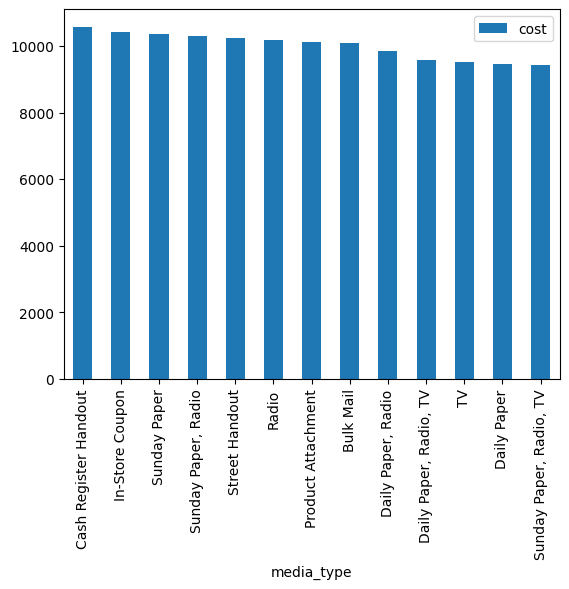

In [11]:
# visualize the average value of media costs for promotions
df_promotion.groupby('media_type')[['cost']].mean().sort_values(by='cost', ascending=False).plot(kind='bar')

In [12]:
df_promotion.media_type.value_counts()

Radio                      164
Daily Paper                162
Product Attachment         161
Sunday Paper               161
Daily Paper, Radio         158
Cash Register Handout      157
Street Handout             155
Sunday Paper, Radio, TV    145
Daily Paper, Radio, TV     143
Sunday Paper, Radio        140
In-Store Coupon            139
TV                          90
Bulk Mail                   88
Name: media_type, dtype: int64

In [13]:
print(df_promotion.end_date.min())
print(df_promotion.end_date.max())

1996-01-06 00:00:00
1999-01-02 00:00:00


In [80]:
# consider the time data to be connected to main data tables
df_time=pd.read_csv('data/time.csv')
df_time.shape

(730, 10)

In [15]:
print(df_time.the_date.min())
print(df_time.the_date.max())
df_time

1997-01-01 00:00:00
1998-12-31 00:00:00


,time_id,the_date,the_day,the_month,the_year,day_of_month,week_of_year,month_of_year,quarter,fiscal_period
0,738,1998-01-07 00:00:00,Wednesday,January,1998,7,4,1,Q1,\N
1,739,1998-01-08 00:00:00,Thursday,January,1998,8,4,1,Q1,\N
2,740,1998-01-09 00:00:00,Friday,January,1998,9,4,1,Q1,\N
3,741,1998-01-10 00:00:00,Saturday,January,1998,10,4,1,Q1,\N
4,742,1998-01-11 00:00:00,Sunday,January,1998,11,5,1,Q1,\N
...,...,...,...,...,...,...,...,...,...,...
725,1092,1998-12-27 00:00:00,Sunday,December,1998,27,4,12,Q4,\N
726,1093,1998-12-28 00:00:00,Monday,December,1998,28,4,12,Q4,\N
727,1094,1998-12-29 00:00:00,Tuesday,December,1998,29,4,12,Q4,\N
728,1095,1998-12-30 00:00:00,Wednesday,December,1998,30,4,12,Q4,\N


In [79]:
# transaction infos for each customer
df_transaction=pd.read_csv('data/Transactions.csv')
df_transaction.shape

(251395, 8)

In [17]:
df_transaction.head()

,product_id,time_id,customer_id,promotion_id,store_id,store_sales,store_cost,unit_sales
0,337,371,6280,0,2,1.50,0.5100,2.0
1,1512,371,6280,0,2,1.62,0.6318,3.0
2,963,371,4018,0,2,2.40,0.7200,1.0
3,181,371,4018,0,2,2.79,1.0323,3.0
4,1383,371,4018,0,2,5.18,2.1756,2.0


In [59]:
# check missing values and duplicate rows in all dataframes
names= [df_customer, df_product, df_product_class, df_promotion, df_time, df_transaction]
def get_df_name(names):
    for df in names:
        for df_name, df_value in globals().items():
            if isinstance(df_value, pd.DataFrame) and df_value is df:
                print('-' * 50)
                print(f'duplicates of {df_name}: {df.duplicated().sum()}\n')
                print(f'null values of {df_name}:\n{df.isnull().sum()}')
                print('')
    
get_df_name(names)

--------------------------------------------------
duplicates of df_customer: 0

null values of df_customer:
customer_id             0
account_num             0
address1                0
address2                0
address3                0
address4                0
city                    0
state_province          0
postal_code             0
country                 0
customer_region_id      0
phone1                  0
phone2                  0
birthdate               0
marital_status          0
yearly_income           0
gender                  0
total_children          0
num_children_at_home    0
education               0
date_accnt_opened       0
member_card             0
occupation              0
houseowner              0
num_cars_owned          0
dtype: int64

--------------------------------------------------
duplicates of df_product: 0

null values of df_product:
product_class_id      0
product_id            0
brand_name            0
product_name          0
SKU                   0


In [81]:
# merge the transaction with time data to know the purchase time for each customer in each store 
df_trans_time= df_transaction.merge(df_time[['time_id', 'the_date', 'quarter']], on='time_id')

In [82]:
# find the revenue of stores 
df_trans_time['trans_revenue']= df_trans_time['store_sales']-df_trans_time['store_cost']

In [83]:
# consider the last 6 months of customer purchases to see the stores with low revenue
df_tmp2= df_trans_time[(df_trans_time.the_date >= '1998-05-01 00:00:00')&\
                           (df_trans_time.the_date < '1998-12-01 00:00:00')]

Text(0, 0.5, 'Revenue and Customer Count')

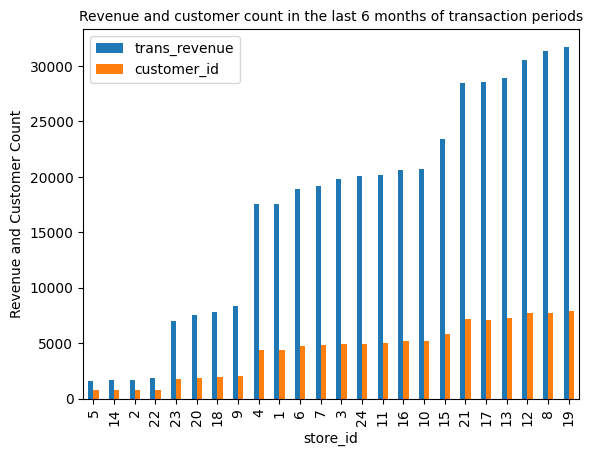

In [84]:
# sum the revenue for each store and select the ones with lowest revenue, and count the customers
df_tmp2.groupby('store_id').agg({'trans_revenue':'sum', 'customer_id':'count'}).sort_values(by='trans_revenue', ascending=True)\
.plot(kind='bar')
plt.title('Revenue and customer count in the last 6 months of transaction periods', fontsize=10)
plt.ylabel('Revenue and Customer Count')

In [76]:
# merge products with transaction data to get the amount of purchases done for each customer in the selected stores
df_tmp3 =df_tmp2.merge(df_product, on='product_id')
select_store= [5,22,2,14, 23, 20,18,9]
df_tmp3= df_tmp3[df_tmp3.store_id.isin(select_store)]
df_select_customer= df_tmp3.groupby(['customer_id']).agg({'SRP':'sum'})\
.sort_values(by='SRP', ascending=True).reset_index().drop_duplicates(subset='customer_id')[:1000]

In [109]:
df_select_customer.head()

,customer_id,SRP
0,4475,0.51
1,6971,0.78
2,1891,1.11
3,1088,1.16
4,5815,1.35


In [110]:
# save the 1000 customers with least purchases
df_select_customer[['customer_id']].to_csv('target_customers/based_SRP_6_months_low_revenue_stores_final3.csv', header=True,\
                          index=False)

In [86]:
# find the transactional revenue of each store for each month
df_trans_time['the_date']= pd.to_datetime(df_trans_time['the_date'])
df_trans_time['trans_month'] =df_trans_time.the_date.dt.to_period('M')

df_trans_time= df_trans_time.groupby(['store_id', 'trans_month'])[['trans_revenue']].sum().sort_values(by=['store_id', 'trans_month']\
, ascending=[False, True]).reset_index()

In [88]:
df_trans_time.head()

,store_id,trans_month,trans_revenue
0,24,1997-01,2843.7913
1,24,1997-02,2309.1260
2,24,1997-03,2839.1643
3,24,1997-04,2582.9633
4,24,1997-05,2603.2180


In [89]:
# find the promotional revenue of each store for each month
df_trans_promo= df_transaction.merge(df_promotion, on='promotion_id')
df_trans_promo['promo_revenue']= df_trans_promo['store_sales']-df_trans_promo['store_cost']
df_trans_promo['start_date']= pd.to_datetime(df_trans_promo['start_date'])
df_trans_promo['promo_month'] =df_trans_promo.start_date.dt.to_period('M')

df_trans_promo= df_trans_promo.groupby(['store_id', 'promo_month'])[['promo_revenue']].sum().sort_values(by=['store_id', 'promo_month']\
, ascending=[False, True]).reset_index()

In [90]:
df_trans_promo.head()

,store_id,promo_month,promo_revenue
0,24,1997-01,1705.2704
1,24,1997-02,526.4917
2,24,1997-03,650.7060
3,24,1997-04,548.5958
4,24,1997-05,567.6482


In [91]:
# select one of the lowest revenue stores and merge transactional with promotional revenue data
df_trans_promo= df_trans_promo[df_trans_promo.store_id==9]
df_trans_time= df_trans_time[df_trans_time.store_id==9]
df_time_promo= df_trans_promo.rename(columns={'promo_month':'trans_month'}).merge(df_trans_time, on='trans_month', how='right')\
.drop(columns='store_id_x').rename(columns={'store_id_y':'store_id'}).fillna(0.0)

df_time_promo.trans_month= df_time_promo.trans_month.astype(str)

In [92]:
df_time_promo

,trans_month,promo_revenue,store_id,trans_revenue
0,1998-01,761.3246,9,1277.3332
1,1998-02,0.0000,9,1323.2972
2,1998-03,824.4635,9,1510.5934
3,1998-04,1195.1778,9,1429.9762
4,1998-05,0.0000,9,1167.9236
5,1998-06,1025.3027,9,1560.2414
6,1998-07,1104.1668,9,1081.2577
7,1998-08,0.0000,9,1439.6906
8,1998-09,670.1863,9,1064.4058
9,1998-10,0.0000,9,912.8811


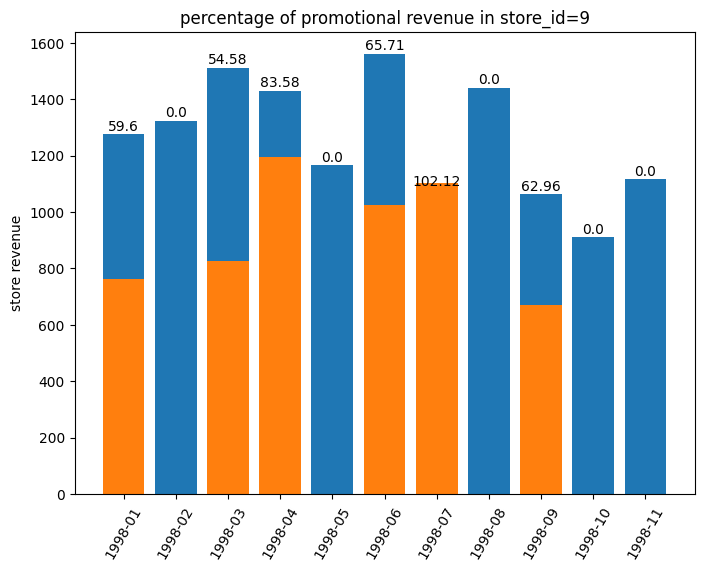

In [107]:
# visualize the percentage contribution of promotion to the total revenue of the store
pct= []
for i in range(df_time_promo.shape[0]):
    pct_revenue= (df_time_promo.promo_revenue[i] / df_time_promo.trans_revenue[i]) *100
    pct.append(round(pct_revenue,2))

df_time_promo['pct_revenue']= pct

plt.figure(figsize=(8,6))
trans_plot= plt.bar(df_trans_time['trans_month'].astype(str), df_trans_time['trans_revenue'])
revenue_plot= plt.bar(df_trans_promo['promo_month'].astype(str), df_trans_promo['promo_revenue'])

i=0
for p in trans_plot:
    width= p.get_width()
    height= p.get_height()
    x,y= p.get_xy()
    plt.text(x+width/2, y+height *1.01, str(df_time_promo.pct_revenue[i]), ha='center')
    i+=1

plt.title(f'percentage of promotional revenue in store_id={df_time_promo.store_id.unique()[0]}')
plt.xticks(rotation=60)
plt.ylabel('store revenue')
#ax= plt.gca()
#ax.get_yaxis().set_visible(False)
plt.show();


Text(0, 0.5, 'average media cost and total revenue')

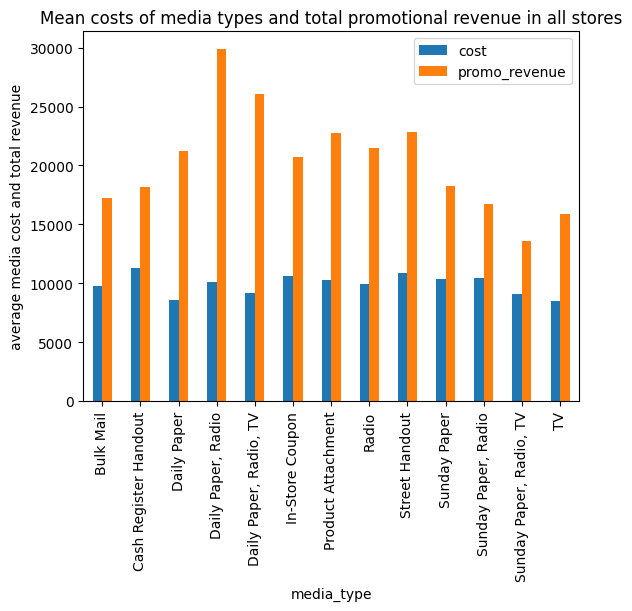

In [94]:
# compare the media types in terms of mean cost and associated total revenue in all stores
df_trans_media= df_transaction.merge(df_promotion, on='promotion_id')
df_trans_media['promo_revenue']= df_trans_media['store_sales']-df_trans_media['store_cost']
df_trans_media.groupby('media_type').agg({'cost':'mean', 'promo_revenue':'sum'}).plot(kind='bar')
plt.title('Mean costs of media types and total promotional revenue in all stores')
plt.ylabel('average media cost and total revenue')

## Check the stores for the cash-register media type

In [96]:
import warnings
warnings.filterwarnings('ignore')

In [97]:
# check the cash-register media type for a selected store before 12.1998
#df_tmp= df_transaction.merge(df_promotion, on='promotion_id')
df_trans_media['end_date']= pd.to_datetime(df_trans_media['end_date'])
df_trans_media['start_date']= pd.to_datetime(df_trans_media['start_date'])
df_cash= df_trans_media[(df_trans_media.media_type=='Cash Register Handout') &\
                        (df_trans_media.start_date <'1998-12-01 00:00:00') &(df_trans_media.store_id==5)]

df_cash['promo_month']= df_cash['start_date'].dt.to_period('M')
df_cash.head()

,product_id,time_id,customer_id,promotion_id,store_id,store_sales,store_cost,unit_sales,promotion_district_id,promotion_name,media_type,cost,start_date,end_date,promo_revenue,promo_month
28536,1352,787,4851,373,5,5.30,1.9080,2.0,114,Saving Days,Cash Register Handout,8674.0,1998-02-25,1998-02-28,3.3920,1998-02
28537,637,787,4851,373,5,2.58,0.7998,3.0,114,Saving Days,Cash Register Handout,8674.0,1998-02-25,1998-02-28,1.7802,1998-02
28538,81,787,4851,373,5,6.39,2.8755,3.0,114,Saving Days,Cash Register Handout,8674.0,1998-02-25,1998-02-28,3.5145,1998-02
28539,603,787,4851,373,5,3.69,1.2915,3.0,114,Saving Days,Cash Register Handout,8674.0,1998-02-25,1998-02-28,2.3985,1998-02
28540,181,787,4851,373,5,2.79,1.2276,3.0,114,Saving Days,Cash Register Handout,8674.0,1998-02-25,1998-02-28,1.5624,1998-02


In [98]:
# sum the revenue of the selected media type and create a list of start and end promotion dates
df_promo_start= df_cash.groupby('start_date')[['promo_revenue']].sum().reset_index()
df_promo_end= df_cash.groupby('end_date')[['promo_revenue']].sum().reset_index()
start_promo= list(set(df_cash['start_date'].astype(str)))
end_promo= list(set(df_cash['end_date'].astype(str)))

In [100]:
# merge the transaction with time data to see the revenue change over time
df_trans_time2= df_transaction.merge(df_time[['time_id', 'the_date', 'quarter']], on='time_id')
df_trans_time2['the_date']= pd.to_datetime(df_trans_time2['the_date'])

In [101]:
# find the transaction revenue
df_trans_time2['trans_revenue']= df_trans_time2['store_sales'] - df_trans_time2['store_cost']

In [102]:
# sum the revenue for a selected store
df_select_store= df_trans_time2[df_trans_time2.store_id==5]
df_select_store= df_select_store.groupby('the_date')[['trans_revenue']].sum().reset_index()

In [104]:
# create lists promotion times and associated revenues
select_revenue_start=[58.4, 50, 60]
select_dates_start= ['1998-02-25', '1998-06-17', '1998-07-16']
select_revenue_end=[55, 50]
select_dates_end= ['1998-03-09', '1998-06-19']

In [105]:
df_select_store.head()

,the_date,trans_revenue
0,1998-01-02,39.3531
1,1998-01-16,58.5479
2,1998-01-22,45.8901
3,1998-01-28,39.4943
4,1998-01-29,64.1633


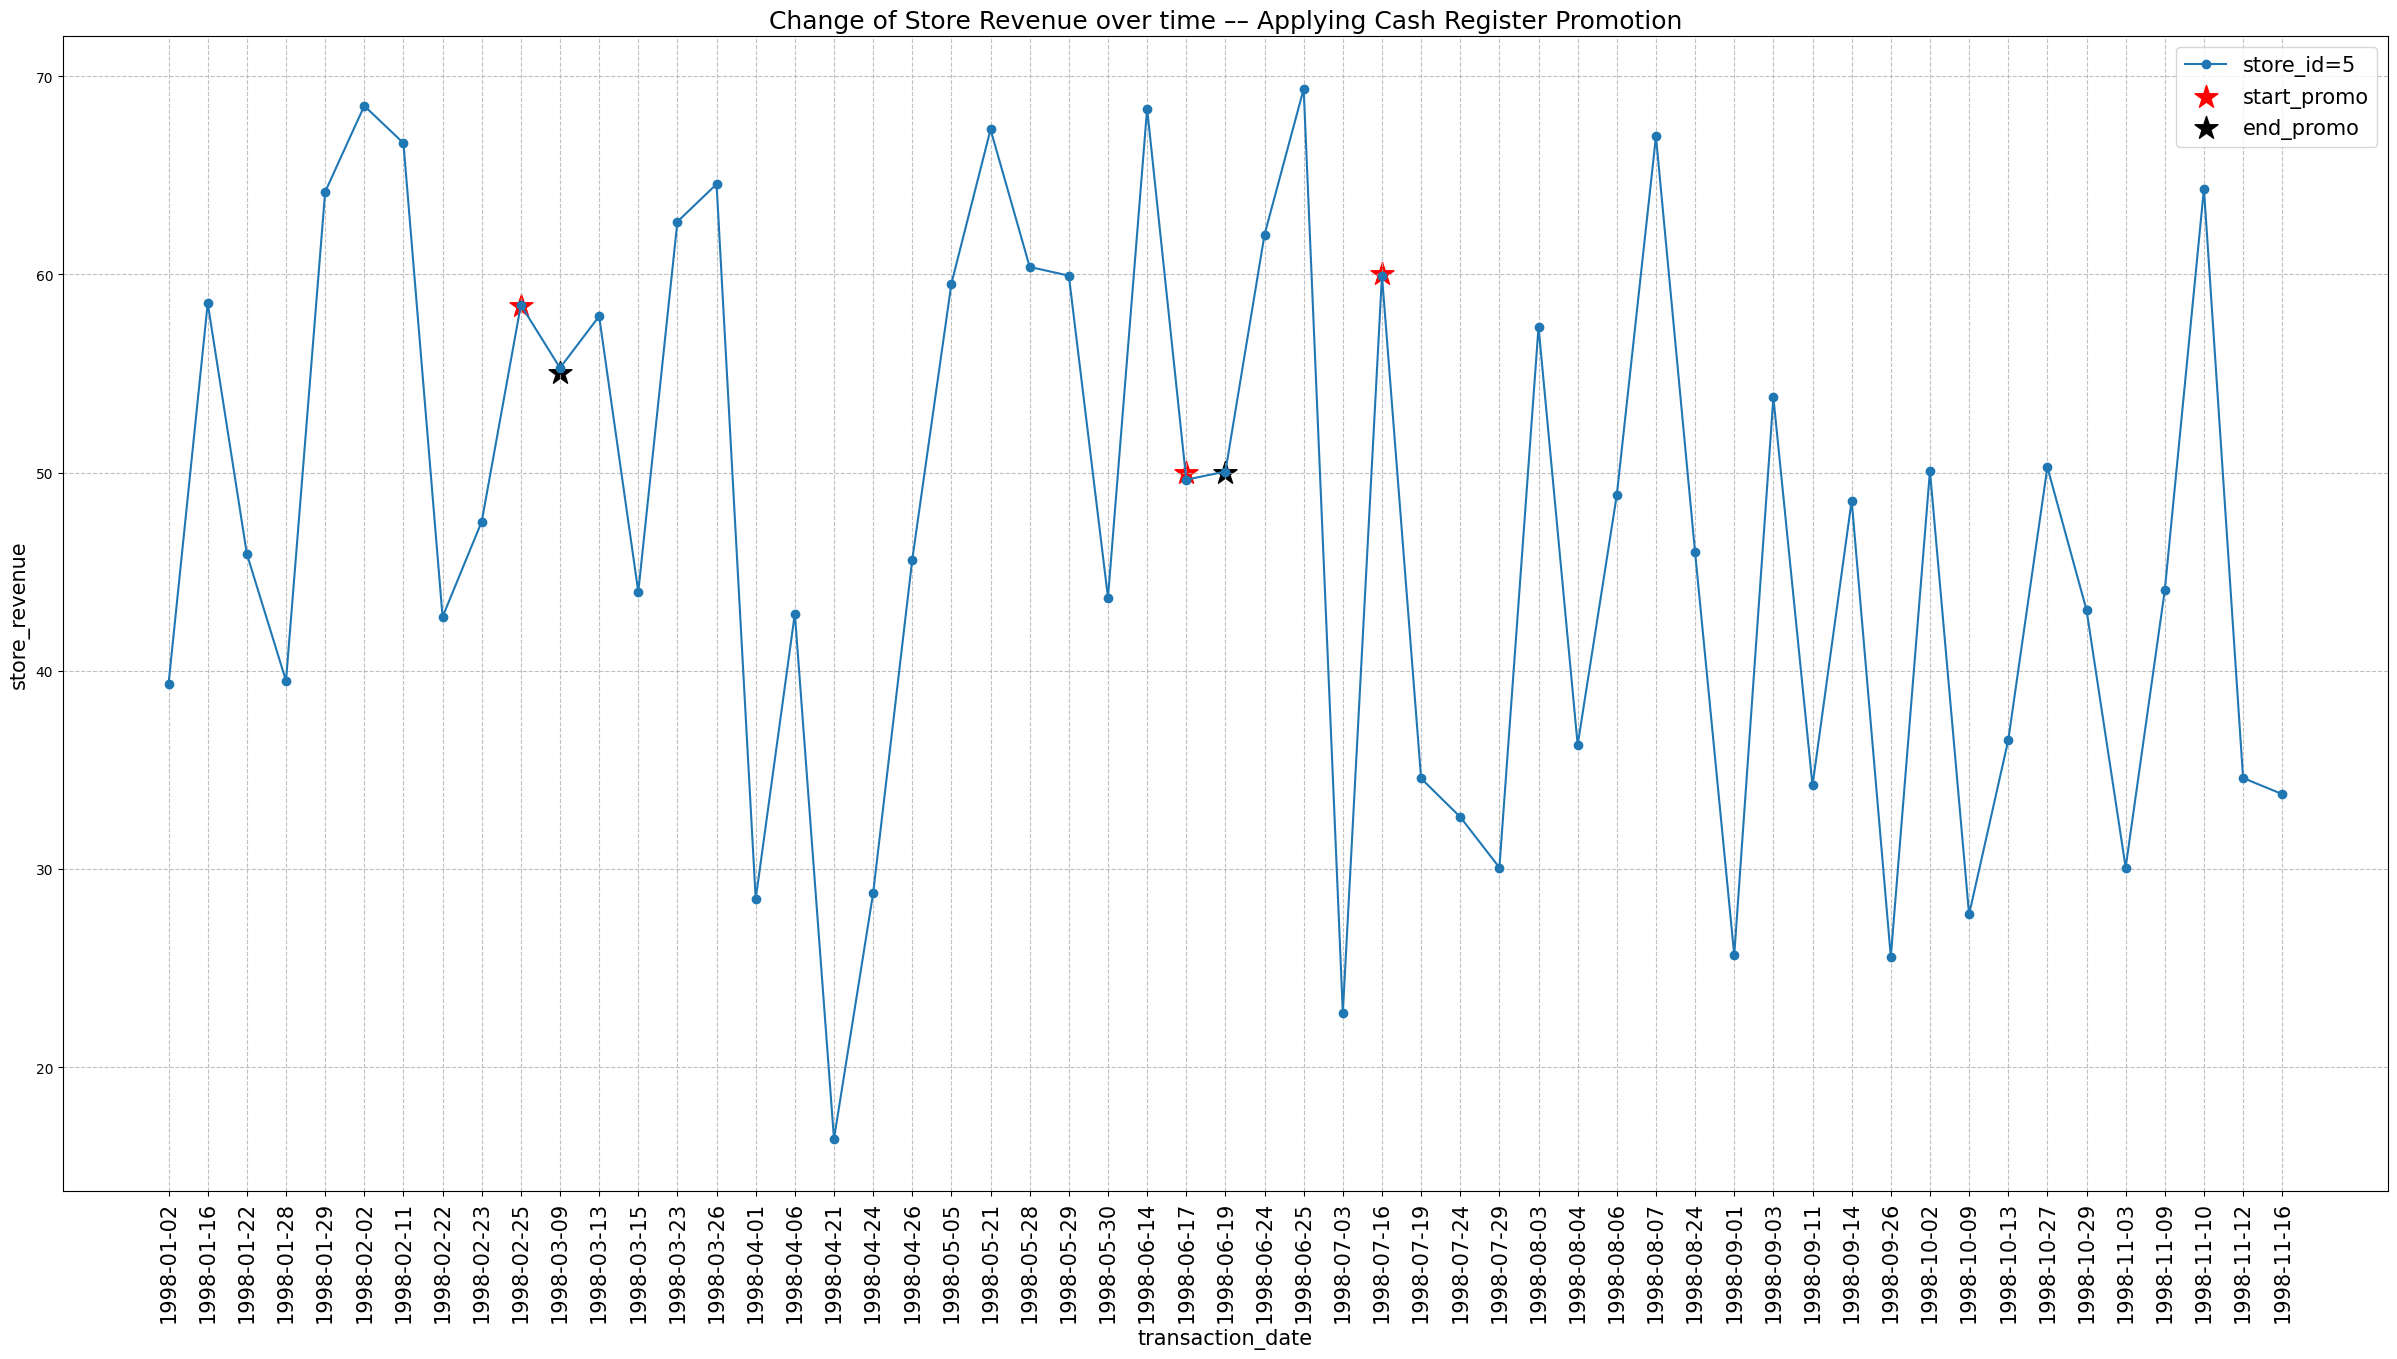

In [106]:
# visualize the revenue change over time for a selected store and the promotional revenue for the chosen media type
plt.figure(figsize=(30,15))
plt.plot(df_select_store['the_date'].astype(str),df_select_store['trans_revenue'], marker='o', label='store_id=5')
plt.scatter(select_dates_start, select_revenue_start, color='red', marker='*', label='start_promo', s=300)
plt.scatter(select_dates_end, select_revenue_end, color='black', marker='*', label='end_promo', s=300)
plt.xticks(rotation=90, fontsize=15)
plt.xlabel('transaction_date', fontsize=15)
plt.ylabel('store_revenue', fontsize=15)
plt.title('Change of Store Revenue over time –– Applying Cash Register Promotion', fontsize=18)
plt.legend(loc='best', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.8)
plt.show();

## Products that deserve promotion over last 6 months

In [121]:
df_transaction.head(2)

,product_id,time_id,customer_id,promotion_id,store_id,store_sales,store_cost,unit_sales
0,337,371,6280,0,2,1.50,0.5100,2.0
1,1512,371,6280,0,2,1.62,0.6318,3.0


In [107]:
# stores with lowest revenue in the last 6 months
select_store= [5,22,2,14, 23, 20,18,9]

# merge the transaction_time data frame with product to know the least sold products in the selected stores in the
# last 6 months
df_trans_prod= df_trans_time2.merge(df_product, on='product_id')
df_trans_prod= df_trans_prod[(df_trans_prod.store_id.isin(select_store)) &\
                             (df_trans_prod.the_date >= '1998-05-01 00:00:00') &\
                             (df_trans_prod.the_date < '1998-12-01 00:00:00')]

df_trans_prod.head(3)

,product_id,time_id,customer_id,promotion_id,store_id,store_sales,store_cost,unit_sales,the_date,quarter,trans_revenue,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
80,337,863,4985,0,23,2.25,0.9450,3.0,1998-05-12,Q2,1.3050,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76
99,337,931,5804,0,5,0.75,0.3150,1.0,1998-07-19,Q3,0.4350,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76
102,337,987,5713,0,2,0.75,0.2775,1.0,1998-09-13,Q3,0.4725,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76


Text(0, 0.5, 'unit_sales')

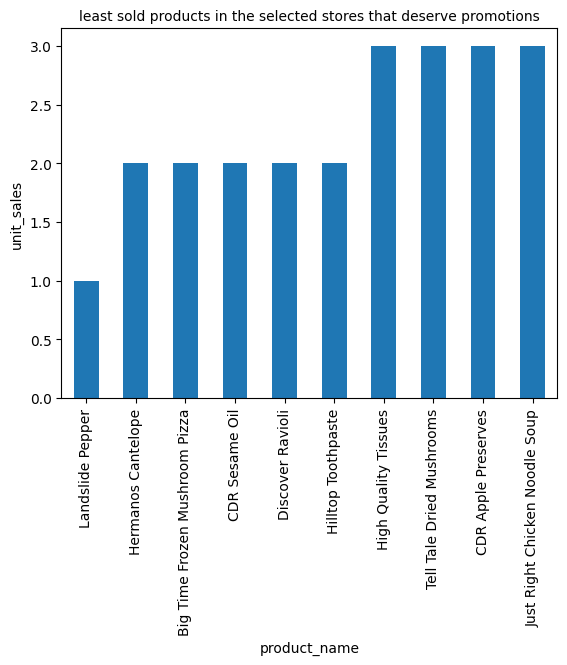

In [108]:
# give promotions either on least sold products in the selected stores or on the total customer purchase
df_select_prod= df_trans_prod.groupby('product_name')[['unit_sales']].sum().sort_values(by='unit_sales', ascending=True)

# visualize the least 10 sold products.
df_select_prod[:10].plot(kind='bar', legend=False)
plt.title('least sold products in the selected stores that deserve promotions', fontsize=10)
plt.ylabel('unit_sales')